In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Week 13 Lab

## Annoucements:

1. Lab 10 is out - due May 6th at 8 pm
2. Final Project due May 8th  at 8 pm now!
3. Final Test - May 11th (details coming soon)

## As always, please email me for questions, office hours, etc.

## Today's Agenda:
### 1. correction for last week 
### 2. Regression! In particular, everything you need to succeed on the final project


## 1. Correction for last Week

Last week I gave you the do it your self correlation recipe, and I made a mistake.

The last step said **add** but it should be **take the mean**.  

Here is the updated recipe:

The correlation recipe:

1. Calculate the mean of a, and the mean of b.


2. Calculate the standard deviation of a, and do the same for b.


3. For each value in a, subtract the mean of a, and then divide by the standard deviation of a.
    1. Call this new column "standardized_a"
    
    
4. For each value in b, subtract the mean of b, and then divide by the standard deviation of b. 
    1. Call this new column "standardized_b"
    
    
5. Then, multiple the values of standardized_a and standardized_b together.
    1. That means take the first value in standardized_a and multiply it with the first value in standardized_b (i.e., standardized_a[0]* standardized_b[0])
    2. Then take the second value in standardized_a and multiply it with the second value in standardized_b (i.e., standardized_a[1]* standardized_b[1])
    3. Do this for the third values, then fourth, etc.
    
    
6. Then take the mean.
    1. Take the multipled numbers from the first row, add them to the second rows multiplied numbers, then the third, etc.
    2. So add standardized_a[0]* standardized_b[0] + standardized_a[1]* standardized_b[1] + ...
    3. Then divide by the number of values.
    


In [2]:
#simulating some data
np.random.seed(0)

a = np.linspace(0,10, 100)
error = np.random.normal(.01, scale =1, size = 100)
b = a + error

In [3]:
#Step 1:

mean_a = np.mean(a)
mean_b = np.mean(b)

#Step 2:

std_a = np.std(a)
std_b = np.std(b)

#Step 3:

standardized_a = (a - mean_a)/std_a

#Step 4:

standardized_b = (b - mean_b)/std_b

#Step 5:

multiplied_rows = standardized_a * standardized_b

#step 6:

correlation = np.mean(multiplied_rows)
    

In [4]:
correlation

0.9423980445319913

In [5]:
np.corrcoef(a,b)

array([[1.        , 0.94239804],
       [0.94239804, 1.        ]])

## Apologies!

## 2. Regression

So far we've talked a lot about correlation, but what about regression?

Correlation essentially tells us how strong the linear association is between two variables. 

The closer to 1, or -1, the stronger the association, while the closer to 0 the weaker the correlation. 

Regression is the **actual** best possible linear relationship between the two variables.

Correlation tells us how good a job a line could do explaining their relationship, and regression is that actual line.

What do I mean?

Let's look at the hate data again from last week.

In [6]:
hate_data = pd.read_csv("hate_crimes.csv")

In [7]:
hate_data.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


Text(0, 0.5, 'Number of Hate Crimes')

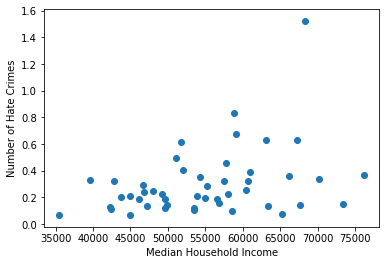

In [8]:
x = hate_data.median_household_income
y = hate_data.hate_crimes_per_100k_splc
plt.scatter(x, y)
plt.xlabel("Median Household Income")
plt.ylabel("Number of Hate Crimes")

So how do we draw a line?

We are going to use the statsmodel package. We did go over how to do it manually in class, but we need things like p-values and confidence intervals, and those are too difficult to do manually in this class.

Here is the import we need:

In [9]:
import statsmodels.api as sm

Ok, we need to run a regression, also known as fitting regression.

In this class, we are just going to relate one indepent variable and one dependent variable, but know that it is possible to relate many independent variables to one dependent variable (aka multivariable regression).

In this example, income is the indepedent (also known as explanatory) variable.

Number of hate crimes is the depedent variable.

We are regressing hate crimes on income. 

Basically, we want to see how well hate crimes can be explained by income.

Note: we are not estimating or showing a casual relationship. We are just estimating the exact linear association between the two when hate crimes is regressed on income. 

Before we run a regression, we specify the regression equation.

Basically, what are we estimating?

Well, we are estimating a line, where income predicts hate crime, with an intercept, which looks like:

$hate\_crime_i = \alpha + \beta*income_i + e_i$

What is that?

Well it is a simple line, $y = mx + b$, where

$ y = hate\_crimes_i$

$ x = income_i$

$m$ is just expressed as $\beta$ (pronounced beta). This is just convention.

Finally, we have the error term $e_i$, these are also known as our residual term.

Ok, so what are all little 'i's?

Well remember, are dealing with data. That means this regression equation must apply for each observation in the data. 

So observation one is $i= 1$, where we plug in the first value of income, and the first value of hate crimes into the equation. 

But this is math, the equation has to add up. If the line doesn't perfectly predict $hate\_crimes$ the equation won't balance. $e_i$ is the residual. It is whatever the line does not explain in the dependent variable.

Notice $\alpha$ (pronounced alpha) and the slope ($\beta$), do not have "i", because they are the same for every row/observation of the data.

When we run a regression, all we are doing are trying to estimate what $\alpha$ (intercept) and $\beta$ (slope) are. 

So how do we do it?

In [10]:
x = hate_data.median_household_income #independent variable
y = hate_data.hate_crimes_per_100k_splc #dependent variable

X = sm.add_constant(x) #adding an intercept to the indepedent variable
model = sm.OLS(y,X, missing = 'drop') # Constructing a model
results = model.fit() # fitting the model
print(results.params)

const                     -0.220703
median_household_income    0.000010
dtype: float64


/Users/williamgodel/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
print(results.params[0])

-0.2207028940464716


In [12]:
print(results.params[1])

9.576165313841542e-06


So what did we just do?

Let's go through it.

First, remember this is just a line ($y = mx + b$).

We started off by specificing the indepedent and dependent variables, so:

$ y = hate\_crimes$

$ x = income$

Next, we had to add a constant to the independent variable. Why? Because we want to estimate a line that has an intercept (remember y = mx + b, this is the b). In order to do that, we have to add a constant.

Then we tell python that this is the model we want. Specifically we are saying, here is the model:

$ hate\_crimes = m*income + b$

and importantly to drop missing values.

Finally, we tell python, now please estimate $m$ ($\beta$) and $b$ ($\alpha$) given the data.

We then get to see $b$, which is const, and $m$, which is the coefficient of median_household_income.

Let's graph it.

Text(0, 0.5, 'Number of Hate Crimes')

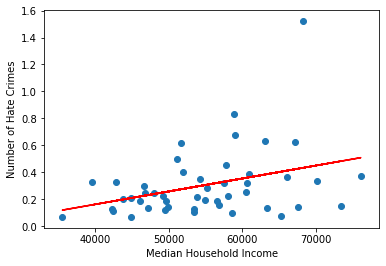

In [13]:
#drawing the line
plt.plot(x,results.params[0] + x*results.params[1], color = "red")

#the standard scatter plot
plt.scatter(x, y)
plt.xlabel("Median Household Income")
plt.ylabel("Number of Hate Crimes")

Or, we can get the predictions directly from `results` by using `predict`.

Text(0, 0.5, 'Number of Hate Crimes')

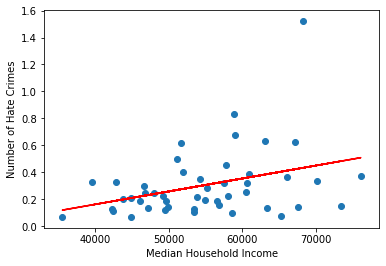

In [15]:
#OR!
#drawing the line
plt.plot(x,results.predict(X), color = "red")

#the standard scatter plot
plt.scatter(x, y)
plt.xlabel("Median Household Income")
plt.ylabel("Number of Hate Crimes")

So how did we graph the line?

Really easy.

We took the constant `results.params[0]` (which is just $b$ or $\alpha$) and then added it to `results.params[1]*income` (which is really just $m*x$ or $\beta*income_i$)

So that is really not bad.

What can we learn from this.

Well, the slope of the line is `results.params[1]`, which is 9.576165313841542e-06, which is a positive but really small number.

In particular it says, for ever one dollar increase in median household income, the number of hatecrimes per 100k people increases by:

.000009576

which is basically nothing but still positive.

So if income goes up by ten thousand we predict: 

In [16]:
.000009576 * 10000

0.09576

Again, not a huge, only about .1

Now the good stuff. 

What if we want more input on the regression? In particular what we call, the regression output.

Well it is just this:

In [17]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.123
Model:                                   OLS   Adj. R-squared:                  0.104
Method:                        Least Squares   F-statistic:                     6.311
Date:                       Thu, 30 Apr 2020   Prob (F-statistic):             0.0157
Time:                               14:26:06   Log-Likelihood:                 1.5490
No. Observations:                         47   AIC:                            0.9020
Df Residuals:                             45   BIC:                             4.602
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2207      0.212     -1.042      0.303      -0.647       0.206
median_household_income  9.576e-06   3.81e-06      2.512      0.016     1.9e-06    1.73e-05
==============================================================================
Omnibus:                       42.220   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.585
Skew:                           2.278   Prob(JB):                     3.01e-36
Kurtosis:                      10.924   Cond. No.                     3.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A little scary.

But importantly, we can get EVERYTHING we need from this.

First, we can find the constant, and the median_household_income slope, both of which are under the coefficient column.

Second, we can find the P value for the slope (P > |t|), which is .016 here.

Third, we can find the 95% confidence interval for the slope ([0.025   0.975]), 1.9e-06 to 1.73e-05.

Finally, we can find $R^2$, here written as R-squared, which is .123.

Ok, we have everything we need to learn about this regression.

We already know how to find the intercept and slope, and we know how to interpret the slope (a one dollar increase, etc...)

What do these other values mean?

## P-value (P > |t|)

We already know what the p value is, right?

It the probability of observing that we observed if the null was true.

So what is our null here?

In these regressions, the null is always the the slope is zero!

A slope of zero between two variables in a regression means no linear relationship.

So what are learning is, what is the probability of observing this slope (9.576e-06) in a sample of data if the true slope is 0?

Well in this case the p-value is 0.016.

If we are using 5% as our cutoff threshold, we can reject the null because .016 < .05.

Amazing. Easy.

In this case I can reject the null.

## 95% confidence interval for the slope ([0.025   0.975])

The same goes for the logic of the confidence interval. 

In this case the confidence interval is [1.9e-06, 1.73e-05.]

That means an interval between:

[.0000019, .0000173]

Is our null (0) in this interval?

No, so we can again reject the null.

We can also see that while the interval has really small numbers, it is really tight.

So we can see that also the slope is really small, our estimate really can't be too far from the truth, because the condifence interval is so small.

## $R^2$ or R-squared

What is $R^2$?

Well $R^2$ is always a number between 0 and 1.

$R^2$  tells us what percentage of the variation x and y explain in each other.

The closer to zero, the less variation they explain in each other.

The closer to 1, the more they explain in each other.

Why is this useful?

Well, even if our regression finds a slope that is statistically significant (below .05), it could still be the case that the line doesn't do a great job of explaining the variation in the dependent variable.

Basically, the is helpful, but not explaining that much.

In this case, the line is statistically significant, but our $R^2$ is only 0.123.

0.123 is kind of low. This tells us that only 12% of the variation in hate crimes is explained by income, using this line. So the other 87% or so of variation must be explained by other things.

So we have higher confidence there is a linear relationship (the p value is low) but we know that that linear relationship doesn't explain too much.

## Correlation (R) and R^2

Importantly, $R^2$ is what we get when we square correlation.

Remeber, $R$ (correlation) is a measure of the strength of the linear association between two variables, along with the direction of that relationshio.

$R^2$ is the percetantage of the variation x explains in y (and vice versa) using a line.

They basically tell us very, very similar information, but they have slightly different interpretations.


## Residuals and Heteroscedasticity

What are residuals?

Well, remember, we have a line to predict data.

In this case, we have the actual $hate\_crimes_i$ data, and we have a line we use to predict it, $\alpha + \beta*income_i$.

Residuals are just how much the line missed by for each observation.

Residuals $ = hate\_crimes_i - (\alpha + \beta*income_i)$

or more accurately:

$e_i= hate\_crimes_i - (\alpha + \beta*income_i)$

The residuals just tell us, for each observation, how much did I miss by?

Well we can calculate that.

We can actually calculate it two ways (they are the same

In [18]:
residuals = y - (results.params[0] + x*results.params[1])

In [19]:
residuals = y - results.predict(X)

In [20]:
residuals.head()

0   -0.058319
1   -0.283183
2   -0.025642
3   -0.140417
4   -0.102725
dtype: float64

Remember, y is hate crimes, and x is income.

We just take what we saw (y) and subtract what we predict with the regression.

We then want to plot, for each x, how much did we miss?

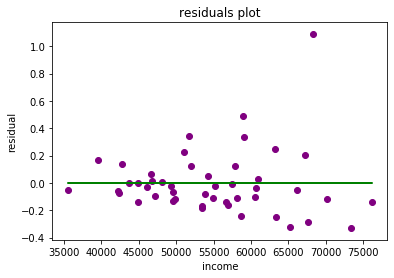

In [22]:
plt.scatter(x,residuals, color = "purple")
plt.title("residuals plot")
plt.xlabel("income")
plt.ylabel("residual")

#drawing a line
plt.plot(x,[0]*len(x), color = "green")

What we want is not to see any pattern here.

We want our errors to be random looking.

If there is a pattern, that means we are systematically making mistakes.

There is one particular type of issue, heteroscedasticity. 

What is that?

It means a change in variance.

Remember, variance measures how spread out our data is. 

Heteroscedasticity means that the variance of our errors (how spread out they are) changes over the data.

Homoscedasticity means they don't change. 

Does our data exhibit heteroscedasticity?

Yes. 

The variance around 40000 of the residuals is much lower than the variance around 60000. 